# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

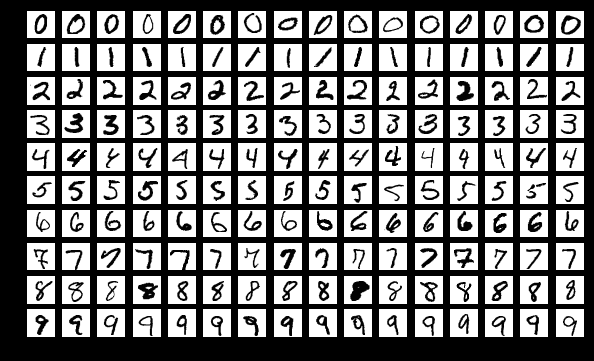

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.



**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(10, 8), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()
    
mnist = fetch_openml('mnist_784', version=1)

images = mnist.data
targets = mnist.target

# draw 12 images along with their labels
show_some_digits(images, targets, 12)

<Figure size 1600x1280 with 12 Axes>

In [9]:
import mnist

#The dataset is downloaded and cached in your temporary directory, 
#so, calling the functions again, is much faster and doesn't hit the server.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

#Images are returned as a 3D numpy array (samples * rows * columns). 
#To train machine learning models, usually a 2D array is used (samples * features). 
X = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))

In [6]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(images, targets, test_size=0.4)

In [7]:
X_train.shape

(42000, 784)

In [8]:
X = X_train
y = y_train
N,M = X.shape
classNames=np.unique(y)


In [9]:
# Center the data (subtract mean column values)
Xc = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = np.linalg.svd(Xc,full_matrices=False)
#U = mat(U)
V = V.T

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Project data onto principal component space
Z = Xc @ V

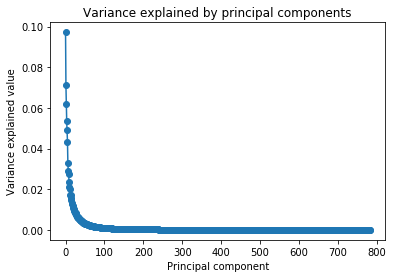

In [10]:
# Plot variance explained
plt.figure()
plt.plot(rho,'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained value');

In [14]:
# Plot PCA1 and PCA2 of the data
f = plt.figure()
plt.title('pixel vectors of handwr. digits projected on PCs')
plt.scatter(Z[:,0], Z[:,1],c=y)
plt.legend(classNames)
plt.xlabel('PC1')
plt.ylabel('PC2')

ValueError: RGBA values should be within 0-1 range

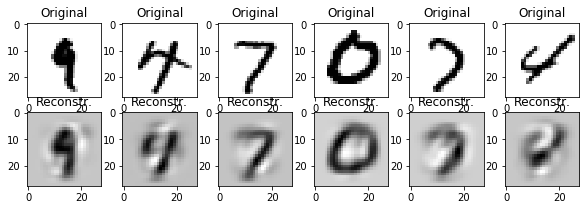

In [15]:
# Visualize the reconstructed data from the first K principal components
# Select randomly D digits.
K=15
nD=range(6)

plt.figure(figsize=(10,3))
W = Z[:,range(K)] @ V[:,range(K)].T # what does the W represent?
D = len(nD)

for d in range(D):
    digit_ix = np.random.randint(0,N)

    plt.subplot(2, D, d+1)
    I = np.reshape(X[digit_ix,:], (28,28))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.title('Original')

    plt.subplot(2, D, D+d+1)
    I = np.reshape(W[digit_ix,:]+X.mean(0), (28,28))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.title('Reconstr.');

In [17]:
clf=sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)

clf.fit(Z[:,range(K)],y)

ValueError: bad input shape (14000, 784)

In [ ]:
clf.score(X_train, y_train)
clf.score(X_test, y_test)